### Q-2. 
Imagine you have a dataset where you have different features like Age ,
Gender , Height , Weight , BMI , and Blood Pressure and you have to classify the people into
different classes like Normal , Overweight , Obesity , Underweight , and Extreme Obesity by using
any 4 different classification algorithms. Now you have to build a model which
can classify people into different classes.

In [1]:
## Import the necessary libraries:-
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load the dataset
data = pd.read_csv("ObesityDataSet_raw_and_data_sinthetic.csv")

In [3]:
## Checking top 5 rows
data.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [4]:
## Checking Rows & Columns Availabale in Dataset
data.shape

(2111, 17)

In [5]:
data['NObeyesdad'].value_counts()

Obesity_Type_I         351
Obesity_Type_III       324
Obesity_Type_II        297
Overweight_Level_I     290
Overweight_Level_II    290
Normal_Weight          287
Insufficient_Weight    272
Name: NObeyesdad, dtype: int64

In [6]:
## Checking Details Information related with Dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

In [7]:
data.isnull().sum() #No null values

Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

In [8]:
## Checking All Columns name present in dataset
data.columns

Index(['Gender', 'Age', 'Height', 'Weight', 'family_history_with_overweight',
       'FAVC', 'FCVC', 'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE',
       'CALC', 'MTRANS', 'NObeyesdad'],
      dtype='object')

In [9]:
## Checking Statistical Analysis of Dataset
data.describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.312600,1.701677,86.586058,2.419043,2.685628,2.008011,1.010298,0.657866
std,6.345968,0.093305,26.191172,0.533927,0.778039,0.612953,0.850592,0.608927
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.947192,1.630000,65.473343,2.000000,2.658738,1.584812,0.124505,0.000000
50%,22.777890,1.700499,83.000000,2.385502,3.000000,2.000000,1.000000,0.625350
75%,26.000000,1.768464,107.430682,3.000000,3.000000,2.477420,1.666678,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


In [10]:
## Checking Information Related with Dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

### Preprocess the dataset

In [11]:

encoder = LabelEncoder()
data['Gender'] = encoder.fit_transform(data['Gender'])
data['family_history_with_overweight'] = encoder.fit_transform(data['family_history_with_overweight'])
data['FAVC'] = encoder.fit_transform(data['FAVC'])
data['CAEC'] = encoder.fit_transform(data['CAEC'])
data['SMOKE'] = encoder.fit_transform(data['SMOKE'])
data['SCC'] = encoder.fit_transform(data['SCC'])
data['CALC'] = encoder.fit_transform(data['CALC'])
data['MTRANS'] = encoder.fit_transform(data['MTRANS'])
data['NObeyesdad'] = encoder.fit_transform(data['NObeyesdad'])

In [12]:
## Checking Details Information related with Dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   int32  
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   int32  
 5   FAVC                            2111 non-null   int32  
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   int32  
 9   SMOKE                           2111 non-null   int32  
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   int32  
 12  FAF                             21

In [13]:
# Split the dataset into features (X) and target (y)
X = data.drop('NObeyesdad', axis=1)
y = data['NObeyesdad']

In [14]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [15]:
# Decision Tree Classifier
dt_clf = DecisionTreeClassifier()
dt_clf.fit(X_train, y_train)
dt_predictions = dt_clf.predict(X_test)
dt_accuracy=accuracy_score(y_test,dt_predictions)
dt_accuracy

0.9408983451536643

array([[54,  2,  0,  0,  0,  0,  0],
       [ 4, 56,  0,  0,  0,  2,  0],
       [ 0,  1, 71,  4,  0,  0,  2],
       [ 0,  0,  3, 55,  0,  0,  0],
       [ 0,  0,  0,  0, 63,  0,  0],
       [ 0,  5,  0,  0,  0, 51,  0],
       [ 0,  0,  0,  0,  0,  2, 48]], dtype=int64)

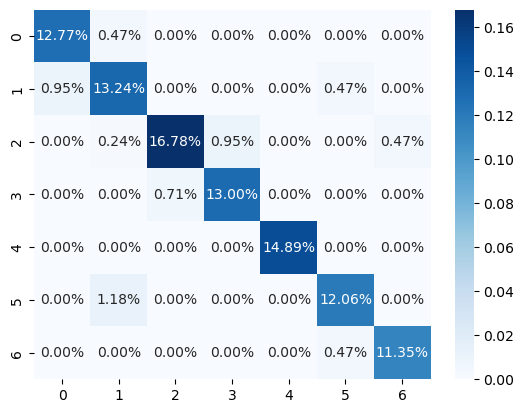

In [16]:
cm=confusion_matrix(y_test,dt_predictions)
sns.heatmap(cm/np.sum(cm), annot=True,cmap="Blues", fmt='.2%')
cm

In [17]:
# Logistic Regression Classifier
lr_clf = LogisticRegression()
lr_clf.fit(X_train, y_train)
lr_predictions = lr_clf.predict(X_test)
lr_accuracy=accuracy_score(y_test,lr_predictions)
lr_accuracy

0.6548463356973995

array([[52,  2,  0,  0,  0,  2,  0],
       [17, 26,  4,  1,  1,  6,  7],
       [ 0,  0, 47,  9,  6,  3, 13],
       [ 0,  0,  3, 49,  0,  0,  6],
       [ 0,  0,  0,  0, 63,  0,  0],
       [ 1, 14, 11,  0,  0, 21,  9],
       [ 0,  7, 16,  1,  0,  7, 19]], dtype=int64)

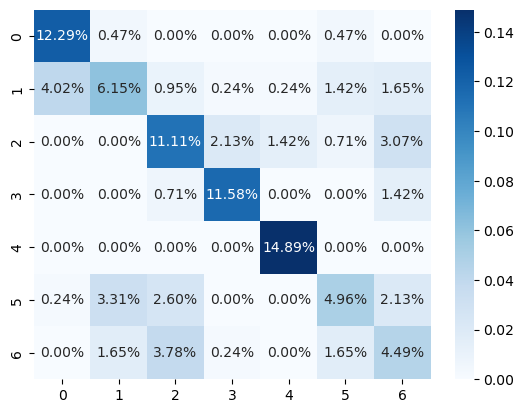

In [18]:
cm=confusion_matrix(y_test,lr_predictions)
sns.heatmap(cm/np.sum(cm), annot=True,cmap="Blues", fmt='.2%')
cm

In [19]:
# Random Forest Classifier
rf_clf = RandomForestClassifier()
rf_clf.fit(X_train, y_train)
rf_predictions = rf_clf.predict(X_test)
rf_accuracy=accuracy_score(y_test,rf_predictions)
rf_accuracy

0.9645390070921985

array([[54,  2,  0,  0,  0,  0,  0],
       [ 0, 60,  0,  0,  0,  2,  0],
       [ 0,  0, 76,  2,  0,  0,  0],
       [ 0,  0,  1, 57,  0,  0,  0],
       [ 0,  0,  0,  0, 63,  0,  0],
       [ 0,  6,  0,  0,  0, 49,  1],
       [ 0,  0,  0,  0,  0,  1, 49]], dtype=int64)

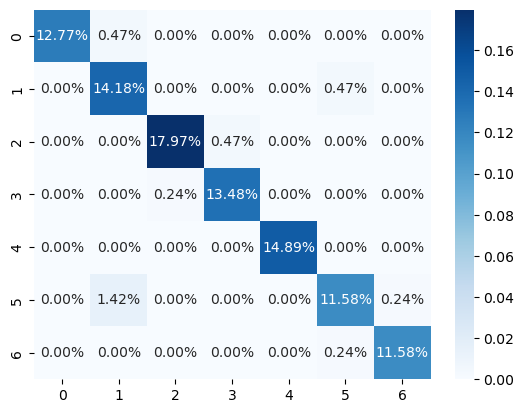

In [20]:
cm=confusion_matrix(y_test,rf_predictions)
sns.heatmap(cm/np.sum(cm), annot=True,cmap="Blues", fmt='.2%')
cm

In [21]:
# Support Vector Machine (SVM) Classifier
svm_clf = SVC()
svm_clf.fit(X_train, y_train)
svm_predictions = svm_clf.predict(X_test)
svm_accuracy=accuracy_score(y_test,svm_predictions)
svm_accuracy

0.5650118203309693

array([[49,  7,  0,  0,  0,  0,  0],
       [18, 21,  0,  0,  0, 20,  3],
       [ 0,  0, 26,  7, 21,  1, 23],
       [ 0,  0,  5, 24, 29,  0,  0],
       [ 0,  0,  0,  0, 63,  0,  0],
       [ 2, 14,  0,  0,  0, 27, 13],
       [ 0,  2,  9,  0,  0, 10, 29]], dtype=int64)

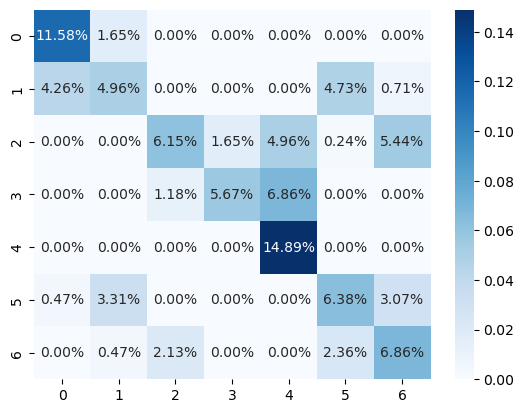

In [22]:
cm=confusion_matrix(y_test,svm_predictions)
sns.heatmap(cm/np.sum(cm), annot=True,cmap="Blues", fmt='.2%')
cm

In [23]:
# Print classification reports for each classifier
print("Decision Tree Classifier:")
print(classification_report(y_test, dt_predictions))

Decision Tree Classifier:
              precision    recall  f1-score   support

           0       0.93      0.96      0.95        56
           1       0.88      0.90      0.89        62
           2       0.96      0.91      0.93        78
           3       0.93      0.95      0.94        58
           4       1.00      1.00      1.00        63
           5       0.93      0.91      0.92        56
           6       0.96      0.96      0.96        50

    accuracy                           0.94       423
   macro avg       0.94      0.94      0.94       423
weighted avg       0.94      0.94      0.94       423



In [24]:
# Print classification reports for each classifier
print("Logistic Regression Classifier:")
print(classification_report(y_test, lr_predictions))

Logistic Regression Classifier:
              precision    recall  f1-score   support

           0       0.74      0.93      0.83        56
           1       0.53      0.42      0.47        62
           2       0.58      0.60      0.59        78
           3       0.82      0.84      0.83        58
           4       0.90      1.00      0.95        63
           5       0.54      0.38      0.44        56
           6       0.35      0.38      0.37        50

    accuracy                           0.65       423
   macro avg       0.64      0.65      0.64       423
weighted avg       0.64      0.65      0.64       423



In [25]:
print("Random Forest Classifier:")
print(classification_report(y_test, rf_predictions))

Random Forest Classifier:
              precision    recall  f1-score   support

           0       1.00      0.96      0.98        56
           1       0.88      0.97      0.92        62
           2       0.99      0.97      0.98        78
           3       0.97      0.98      0.97        58
           4       1.00      1.00      1.00        63
           5       0.94      0.88      0.91        56
           6       0.98      0.98      0.98        50

    accuracy                           0.96       423
   macro avg       0.97      0.96      0.96       423
weighted avg       0.97      0.96      0.96       423



In [26]:
print("SVM Classifier:")
print(classification_report(y_test, svm_predictions))

SVM Classifier:
              precision    recall  f1-score   support

           0       0.71      0.88      0.78        56
           1       0.48      0.34      0.40        62
           2       0.65      0.33      0.44        78
           3       0.77      0.41      0.54        58
           4       0.56      1.00      0.72        63
           5       0.47      0.48      0.47        56
           6       0.43      0.58      0.49        50

    accuracy                           0.57       423
   macro avg       0.58      0.57      0.55       423
weighted avg       0.59      0.57      0.54       423



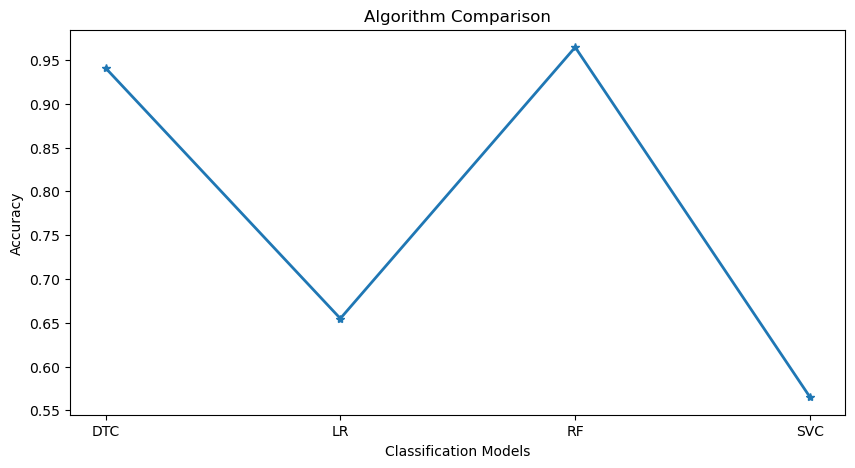

,Accuracy
Decision Tree Classifier,0.940898
Logistic Regression Classifier,0.654846
Random Forest Classifier,0.964539
SVM Classifier,0.565012


In [27]:
models=['DTC','LR','RF','SVC']
accuracy=[dt_accuracy,lr_accuracy,rf_accuracy,svm_accuracy]
plt.figure(figsize=(10,5))
plt.plot(models,accuracy,linewidth=2,marker='*')

plt.xlabel("Classification Models") 
plt.ylabel("Accuracy") 
plt.title("Algorithm Comparison")
plt.show()
df=pd.DataFrame(accuracy,index=['Decision Tree Classifier','Logistic Regression Classifier','Random Forest Classifier','SVM Classifier'],columns=['Accuracy'])
df


### The best model to predict obesit level prediction is Random Forest Classifier with accuracy of 95.5%